In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import operator

In [3]:
# Get the data: Algebra 2005-2006
train_filepath = '/home/mahesh/Dropbox/MS Sem 2/ML/Self-selected/Data/algebra_2005_2006/algebra_2005_2006_train_sample2.txt'
test_filepath  = '/home/mahesh/Dropbox/MS Sem 2/ML/Self-selected/Data/algebra_2005_2006/algebra_2005_2006_test.txt'
traindata = pd.read_table(train_filepath)
testdata = pd.read_table(test_filepath)
# Inspect some of the training data
traindata.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,223023,075kbY53c1,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R1C1,2005-09-02 08:44:24.0,2005-09-02 08:46:55.0,2005-09-02 08:46:55.0,2005-09-02 08:46:55.0,151.0,151.0,NaN,1,0,0,1,NaN,NaN
1,223024,075kbY53c1,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R1C2,2005-09-02 08:46:55.0,2005-09-02 08:47:40.0,2005-09-02 08:47:40.0,2005-09-02 08:47:40.0,45.0,45.0,NaN,1,0,0,1,NaN,NaN
2,223025,075kbY53c1,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R2C1,2005-09-02 08:47:40.0,2005-09-02 08:47:56.0,2005-09-02 08:47:56.0,2005-09-02 08:47:56.0,16.0,16.0,NaN,1,0,0,1,Identifying units,1
3,223026,075kbY53c1,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R2C2,2005-09-02 08:47:56.0,2005-09-02 08:48:04.0,2005-09-02 08:48:04.0,2005-09-02 08:48:04.0,8.0,8.0,NaN,1,0,0,1,Identifying units,2
4,223027,075kbY53c1,"Unit CTA1_01, Section CTA1_01-1",LDEMO_WKST,1,R4C1,2005-09-02 08:48:04.0,2005-09-02 08:48:33.0,2005-09-02 08:48:33.0,2005-09-02 08:48:33.0,29.0,29.0,NaN,1,0,0,1,"Entering a given~~Convert unit, multiplier",1~~1


In [5]:
# The number of unique students
print 'Number of students: ', len(np.unique(traindata['Anon Student Id']))

Number of students:  574


In [6]:
len(traindata[traindata['Correct Step Duration (sec)'] < 106])


606877

In [7]:
csd = traindata['Correct Step Duration (sec)']
csd.describe()

count    620129.000000
mean         18.071478
std          34.796694
min           0.000000
25%           5.000000
50%           8.000000
75%          18.000000
max        1907.000000
Name: Correct Step Duration (sec), dtype: float64

In [8]:
len(traindata[traindata['Problem View'] > 3])
csd_grt_3 = traindata[traindata['Problem View'] > 3]['Correct Step Duration (sec)']
csd_grt_3.describe()

count    47513.000000
mean        17.983710
std         38.081511
min          0.000000
25%          5.000000
50%          8.000000
75%         17.000000
max       1907.000000
Name: Correct Step Duration (sec), dtype: float64

In [9]:
# The number of unique problems
print 'Number of problems: ', len(np.unique(traindata['Problem Name']))

Number of problems:  1084


In [10]:
csd = traindata['Correct Step Duration (sec)']
csd.describe()

count    620129.000000
mean         18.071478
std          34.796694
min           0.000000
25%           5.000000
50%           8.000000
75%          18.000000
max        1907.000000
Name: Correct Step Duration (sec), dtype: float64

In [11]:
print len(traindata['Problem Name']), len(testdata['Problem Name'])

809694 3967


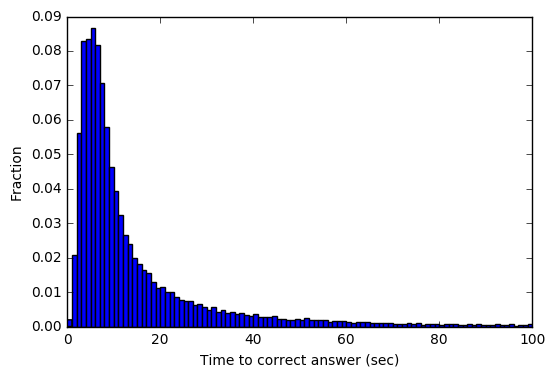

In [13]:
%matplotlib inline
hist = plt.hist(np.array(csd_grt_3.dropna()),bins=100,normed=True,log=False,range=(0,100))
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Fraction')
plt.show()

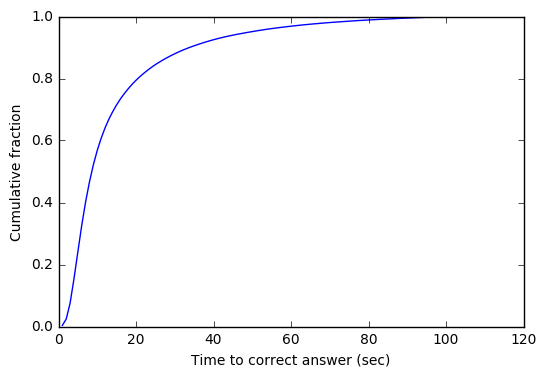

In [21]:
counts, bins = hist[0], hist[1]
cdf = np.cumsum(counts)
plt.plot(bins[1::], cdf)
plt.xlabel('Time to correct answer (sec)')
plt.ylabel('Cumulative fraction')
plt.axis((0,120,0,1.0))
plt.show()

In [24]:
# Get just the uniques
problems = np.unique(traindata['Problem Name'])
pmedian_times = {}
for p in problems:
    pmedian_times[p] = traindata[traindata['Problem Name'] == p]['Correct Step Duration (sec)'].median()

In [23]:
pmedian_times

{'NEWS02': 5.0,
 'NEWS01': 11.0,
 'PROP19': 6.0,
 'REAL29': 5.5,
 'PROP12': 12.0,
 'REAL25': 9.0,
 'REAL27': 9.0,
 'REAL20': 15.0,
 'REAL19B': 10.0,
 'TRANSFORMG019': 1.6669999999999998,
 'NEWSQUARE4TRE': 8.0,
 'NEWSQUARE2TRE': 7.0,
 'DEC03C': 13.0,
 'DEC03B': 8.0,
 'DEC03A': 12.0,
 'EG11C': 10.0,
 'EG11B': 11.0,
 'EG11A': 10.0,
 'EG-FACTOR18': 9.0,
 'BH1T39A': 12.0,
 'BH1T39B': 11.0,
 'BH1T39C': 12.0,
 'IPCSNOW': 6.0,
 'PROP13': 18.0,
 'DIST01': 6.0,
 'EG-FACTOR10': 7.0,
 'EG-FACTOR11': 9.0,
 'EG-FACTOR12': 6.0,
 'EG-FACTOR13': 4.0,
 'EG-FACTOR14': 6.0,
 '2PTFB22': 7.0,
 '2PTFB21': 7.0,
 '2PTFB20': 8.0,
 'EG35': 5.0,
 'EG34': 6.0,
 'EG37': 4.0,
 'EG36': 8.0,
 'EG31': 6.0,
 'EG30': 7.0,
 'EG33': 4.0,
 'EG32': 4.0,
 'LIT24A': 11.5,
 'TRANSFORMG027': 2.5,
 'SYSFB19': 8.0,
 'SYSFB18': 10.0,
 'DEMO_10': 6.0,
 'EG38': 7.0,
 'TRANSFORMG020': 2.5,
 'TRANSFORMG021': 2.0,
 'LIT33A': 8.0,
 'PROP10': 11.0,
 'LIT70A': 11.0,
 'PERCENT15': 7.0,
 'TPH04': 7.0,
 'IPCBABY': 9.0,
 'LIT86': 9.0,
 'LIT69'

In [11]:
sorted_times = sorted(pmedian_times.iteritems(), key=operator.itemgetter(1), reverse=True)

In [12]:
sorted_times

[('EG9B', 86.0),
 ('EG42C', 27.0),
 ('EG38B', 21.5),
 ('LIT79', 21.0),
 ('EG42A', 20.0),
 ('LIT23A', 19.0),
 ('L3NOV10', 16.25),
 ('JAN11B', 16.0),
 ('BH1T39C', 12.0),
 ('EG36', nan),
 ('LIT24A', 26.5),
 ('EG11A', 13.0),
 ('BH1T39B', 13.0),
 ('EG-FACTOR18', 12.5),
 ('EG11B', 12.0),
 ('SYSFB18', 12.0),
 ('SYSFB24', 12.0),
 ('EG42B', 11.0),
 ('LIT78', 11.0),
 ('REAL13C', 11.0),
 ('REAL28', 10.5),
 ('BH1T39A', 10.5),
 ('EG11C', 9.5),
 ('IPCBABY', 9.5),
 ('PROP12', 9.0),
 ('SYSFB11', 9.0),
 ('NEWSQUARE4TRE', 8.0),
 ('NEWSQUARE2TRE', 7.0),
 ('2PTFB21', 7.0),
 ('LIT33A', 7.0),
 ('LIT70A', 7.0),
 ('IPCSNOW', 6.5),
 ('DEC03C', 6.0),
 ('2PTFB20', 6.0),
 ('EG31', 6.0),
 ('EG-FACTOR12', 5.0),
 ('2PTFB22', 5.0),
 ('EG35', 5.0),
 ('EG34', 5.0),
 ('EG30', 5.0),
 ('EG38', 5.0),
 ('EG-FACTOR13', 4.0),
 ('EG32', 4.0),
 ('EG39', 4.0),
 ('YLT3X+5', 4.0),
 ('EG-FACTOR14', 3.0),
 ('EG-FACTOR11', 2.5),
 ('EG-FACTOR10', 2.0),
 ('EG33', 2.0),
 ('LIT1', nan),
 ('LIT59A', 25.5),
 ('PERCENT04B', 18.0),
 ('REAL17

In [13]:
# Create empty list
KCs = []

# Grab the column of Knowledge Components, dropping all NaNs
KCcol = traindata['KC(Default)']
KCcol = list(KCcol.dropna())

# Loop over every database entry, read the skills, split on '~~' separator, and append to list
for i in range(len(KCcol)):
    skills = KCcol[i].split('~~')
    for skill in skills:
        KCs.append(skill)
        
# Convert to set, which keeps only unique entries, then convert back to list
KCs = list(set(KCs))

# Print length
print 'The total number of unique skills is: ',len(KCs)

The total number of unique skills is:  98


In [15]:
'''kc_median_times = {}
for kc in KCs:
    kc_median_times[kc] = traindata[traindata['KC(Default)'].dropna().str.contains(kc)]['Correct Step Duration (sec)'].median()
len(kc_median_times)
'''


"kc_median_times = {}\nfor kc in KCs:\n    kc_median_times[kc] = traindata[traindata['KC(Default)'].dropna().str.contains(kc)]['Correct Step Duration (sec)'].median()\nlen(kc_median_times)\n"

In [3]:
# Use dummies in order to map the diagnosis labels to 0 and 1
df_new = pd.get_dummies(traindata)
df_new.head()
cols = list(df_new.columns)
fig, ax = plt.subplots(figsize=(26,20))
# We take values[:, 1:] in order to ommit the id's.
cm = np.corrcoef(df_new.values[:, 1:].T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=cols[1:], xticklabels=cols[1:])
plt.show()

MemoryError: 